In [4]:
import torch
import matplotlib.pyplot as plt

from gptopt.linalg_utils import ns_pinv, rel_err

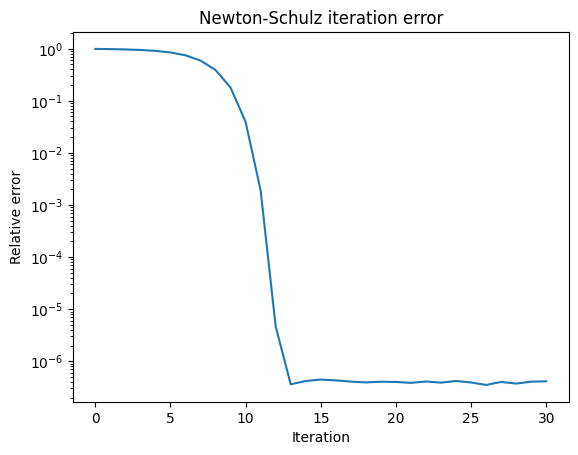

final:  3.5062424785792246e-07


In [5]:
A = torch.randn(6, 6)
A_pinv, A_pinv_errs = ns_pinv(A, steps=30, diagnostics=True)

plt.plot(A_pinv_errs)
plt.title("Newton-Schulz iteration error")
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.yscale("log")
plt.show()

print("final: ", rel_err(A_pinv, torch.linalg.pinv(A)).item())

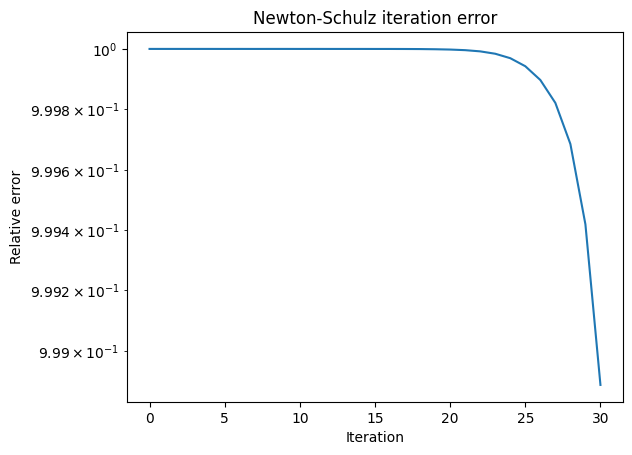

final:  0.9988686442375183


In [6]:
# 7. Ill-conditioned square matrix (singular values differ by many orders)
U, _ = torch.linalg.qr(torch.randn(6, 6))
V, _ = torch.linalg.qr(torch.randn(6, 6))
s = torch.tensor([1.0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
A = U @ torch.diag(s) @ V.T
A_pinv, A_pinv_errs = ns_pinv(A, steps=30, diagnostics=True)

plt.plot(A_pinv_errs)
plt.title("Newton-Schulz iteration error")
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.yscale("log")
plt.show()

print("final: ", rel_err(A_pinv, torch.linalg.pinv(A)).item())